<a href="https://colab.research.google.com/github/mitsouma/Deep-Learning_Labs/blob/main/solution_first_step_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deep learning Introduction: Optimization¶
The goal of this first session of practical is to teach you implement by own deep-learning code of simple neural networks. You learned neural networks in the previous module :). This will is to help you understand liberies such as Keras where training is automated.


We will work with the image database MNIST, consisting of images of handwritten characters (60000 images for training and 10000 for test).

Here is the code to retrieve the data:

In [ ]:
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape each 28x28 image -> 784 dim. vector

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalization
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# visualization



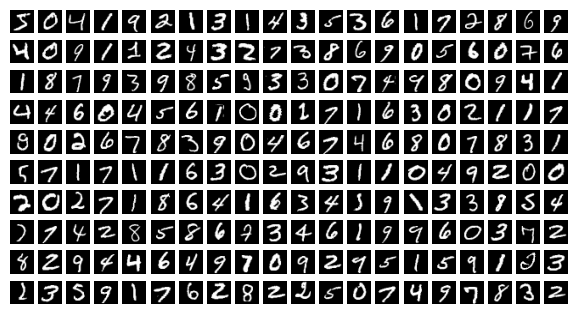

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7.195, 3.841), dpi=100)
for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
    plt.axis('off')
plt.show()

# Model Prediction


We will start by creating a popular linear classification model, logistic regression. This model corresponds to a single layer neural network, which will project the input vector $\bf{x}_i$ for a MNIST image (size $28^2 = 784$) with a vector of parameters $\bf{w}_c$ for each class (plus a bias $\bf{b}_c$). To link this is a very simple way to the previous MNIST data matrix, we consider that each example $\bf{x}_i$ is a line-size vector $(1, 784)$.


By grouping all sets of parameters $w_c$ for the $10$ classes in a matrix $\bf{W}$ (size $784 \times 10$) and the bias in a vector $\bf{b}$, we obtain a vector if $\tilde{\bf{s}}_i = \bf{x}_i\bf{W} + \bf{b}$ of size $(1,10)$.

A soft-max activation function on $\bf{\tilde{y}}_i  = softmax (\tilde{\bf{s}}_i)$ yields the output vector predicted by the model $\bf{\tilde{y}}_i$  of size $(1,10)$ - which represents the posterior probability $p (\bf{\tilde{y}}_i | \bf{x}_i)$ for each of the $10$ classes:

$$ p(\tilde{y}_{c^\prime,i})=\frac{\text{e}^{<\bf{x}_i, \bf{w}_c>+b_c}}{\sum_{c^\prime=1}^{10} \text{e}^{<\bf{x}_i, \bf{w}_{c^{\prime}}>+b_c^\prime}}$$


The diagram below illustrates the logistic regression model with a neural network.

# Formulation of the training problem

In order to train the neural network, we will compare, for each training example, the predicted output $\bf{\tilde{y}}_i $ by the network (equation (1)) for the image $\bf{x}_i$ with the actual output $\bf{y}^*_i $ resulting from the supervision which corresponds to the category of the image $\bf{x}_i$: we will use the one-hot  encoding for $\bf{y}^*_i $ i.e:


\begin{equation}
y^*_{c,i}=1 \text{ if   } c \text{    correspond  to the index of the class} \bf{x}_i~ or ~ y^*_{c,i}=0 \text{   if      } c \text{       does not correspond  to the index of the class       } \bf{x}_i~~~~~~~~~~~~~~~~~~~~~~(1)
\end{equation}
To measure the prediction error, we will use a cross-entropy cost function between  $\tilde{y}_i$ and $y^*_{c,i}$ (the cross entropy is related to the Kullback-Leiber divergence, which is a measure of sissimilarity between probability distributions):


$$\bf{\mathcal{L}}(\tilde{y}_i, y^*_{i})=-\sum_{c=1}^{10}y^*_{c,i}\log(\tilde{y}_{c,i})=-\log(\tilde{y}_{c^*,i})$$ where $c^*$ corresponds to the index of the class given by the supervision of the image $\bf{x}_i$.

The final cost function will be to average the entropy across the whole training base $\mathcal{D}$ consisting of $N = 60000$ images:


\begin{equation}
\bf{\mathcal{L}}_{\bf{W}, \bf{b}}(\mathcal{D})=-\frac{1}{N}\sum_{i=1}^{N}\log(\tilde{y}_{c^*,i})
\end{equation}

## Question

Is the cost function above convex with respect to the parameters $\bf{W}, \bf{b}$ of the model? With a step of a well-chosen gradient, can we ensure convergence towards the global minimum of the solution?


## Optimization of the model

In order to optimize the parameters $\bf{W}$ and $\bf{b}$ of the logistic regression model by gradient descent, we will use the rule of chain level derivatives:

\begin{equation}
\frac{\partial \bf{\mathcal{L}}}{\partial \bf{W}}=\frac{1}{N}\sum_{i=1}^{N}\frac{\partial \bf{\mathcal{L}}}{\partial \bf{\tilde{y}}_i}\frac{\partial \bf{\tilde{y}}_i}{\partial \bf{\tilde{s}}_i}\frac{\partial \bf{s}_i}{\partial \bf{W}}
\end{equation}

\begin{equation}
\frac{\partial \bf{\mathcal{L}}}{\partial \bf{b}}=\frac{1}{N}\sum_{i=1}^{N}\frac{\partial \bf{\mathcal{L}}}{\partial \bf{\tilde{y}}_i}\frac{\partial \bf{\tilde{y}}_i}{\partial \bf{\tilde{s}}_i}\frac{\partial \bf{s}_i}{\partial \bf{b}}
\end{equation}


We know that

\begin{equation}
\frac{\partial \bf{\mathcal{L}}}{\partial \bf{s}_i}=\delta^{\bf{y}}_i=\bf{\tilde{y}}_i-\bf{y_i^*}
\end{equation}

and

\begin{equation}
\frac{\partial \bf{\mathcal{L}}}{\partial \bf{s}_i}=\frac{\partial \bf{\mathcal{L}}}{\partial \bf{\tilde{y}}_i}\frac{\partial \bf{\tilde{y}}_i}{\partial \bf{s}_i}
\end{equation}


Deduce that the gradients of $\mathcal{L}$ with respect to the parameters of the model are written:

\begin{equation}
\frac{\partial \bf{\mathcal{L}}}{\partial \bf{W}}=\frac{1}{N}(\bf{\tilde{Y}}-\bf{Y^*})\bf{X^T}=\frac{1}{N}\bf{X^T}\bf{\Delta^{\bf{y}}}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(2)
\end{equation}


\begin{equation}
\frac{\partial \bf{\mathcal{L}}}{\partial \bf{b}}=\frac{1}{N}\sum_{i=1}^{N}(\bf{\tilde{y}}_i-\bf{y_i^*})~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(3)
\end{equation}

where $\bf{X}$ is the data matrix (size $60000 \times 784)$, $\bf{\tilde{Y}}$ is the matrix of predicted labels on the entire training base (size $60000\times 10)$ and $\bf{Y^*}$ is the matrix of the labels resulting from the supervision (ground truth, size $60000 \times 10)$, and $\bf{\Delta^{\bf{y}}}=\bf{\tilde{Y}}-\bf{Y^*}
$.

## Implementation of the training

The gradients in the above equations (equation (2) and (3)) are written in "vector" form, which makes calculations efficient with libraries of scientific computations like numpy. After calculating the gradient, the parameters will be updated as follows:


\begin{equation}
\bf{W}^{(t+1)}=\bf{W}^{(t)}-\eta \frac{\partial \bf{\mathcal{L}}}{\partial \bf{W}}~~~~~~~~~(4)
\end{equation}

\begin{equation}
\bf{b}^{(t+1)}=\bf{b}^{(t+1)}-\eta \frac{\partial \bf{\mathcal{L}}}{\partial \bf{b}}~~~~~~~~(5)
\end{equation}

where $\eta$ is the step of the gradient or learning rate.

To implement the training algorithm, we will use stochastic gradient descent, i.e. the gradients in equations (2) and (3) will not be calculated on all $N = 60000$ training images, but on a subset called batch. This technique makes it possible to update the parameters more frequently than with conventional gradient descent, and a faster convergence (to the detriment of an approximated gradient calculation).


### Your objective is to understand the above logistic regression algorithm and implement it using the MINST data base.

To start please implement equation (2) which is the code to generate labels (labels) in format $0-1$ encoding.



In [ ]:
from keras import utils

K=10
print (y_train)
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, K)
Y_test = utils.to_categorical(y_test, K)
print (Y_train)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### Put in place a code whose skeleton is given below:![alt text](https://)

In [ ]:
""" import numpy as np
N = X_train.shape[0]
d = X_train.shape[1]
W = np.zeros((d,K))
b = np.zeros((1,K))
numEp = 20 # Number of epochs for gradient descent
eta = 1e-1 # Learning rate
batch_size = 100
nb_batches = int(float(N) / batch_size)
gradW = np.zeros((d,K))
gradb = np.zeros((1,K))

for epoch in range(numEp):
  for ex in range(nb_batches):
     # FORWARD PASS : compute prediction with current params for examples in batch
     # BACKWARD PASS :
     # 1) compute gradients for W and b
     # 2) update W and b parameters with gradient descent

     """


' import numpy as np\nN = X_train.shape[0]\nd = X_train.shape[1]\nW = np.zeros((d,K))\nb = np.zeros((1,K))\nnumEp = 20 # Number of epochs for gradient descent\neta = 1e-1 # Learning rate\nbatch_size = 100\nnb_batches = int(float(N) / batch_size)\ngradW = np.zeros((d,K))\ngradb = np.zeros((1,K))\n\nfor epoch in range(numEp):\n  for ex in range(nb_batches):\n     # FORWARD PASS : compute prediction with current params for examples in batch\n     # BACKWARD PASS :\n     # 1) compute gradients for W and b\n     # 2) update W and b parameters with gradient descent\n\n     '

### To complete this code, you must:

1.   Set up a forward function $forward(batch, W, b)$ that will calculate the prediction for a batch of data. The $forward$ function will be called for each iteration of the previous double loop.

2.   If we consider a batch of data of size $tb \times 784$, the parameters $\bf{W}$ (size $784 \times 10$) and $\bf{b}$ (size $1 \times 10$), the $forward$ function returns the prediction $\bf{\tilde{Y}}$ on the batch (size $tb \times 10$).

3.   The following function can be used to calculate the $softmax$ function on each element of the matrix of the linear projection (size $tb \times 10$):



In [ ]:
def softmax(X):
 # Input matrix X of size Nbxd - Output matrix of same size
 Num = np.exp(X)
 Den = np.sum(Num,axis=1)
 return (Num.T / Den).T

### Complete the code for the backward pass (backprobagation), consisting of:

1.   Calculate the gradients as shown in equations (2) and (3).

2.   Update the parameters by gradient descent as shown in equations (4) and (5).



Finally, you can use the accuracy function $accuracy(W, b, images, labels)$ provided to calculate the good classification rate (good recognition) of the model. This makes it possible to measure the evolution of the performances during the periods of the training algorithm, and on the basis of test once the model has been trained.


#### You must obtain a score of around 90% on the test basis for this logistic regression model :).

In [ ]:
def forward(images, W, b):
    pred = np.matmul(images, W) + b
    return softmax(pred)

In [ ]:
def accuracy(W, b, images, labels):
  pred = forward(images, W,b )
  return np.where( pred.argmax(axis=1) != labels.argmax(axis=1) , 0.,1.).mean()*100.0

In [ ]:
d = X_train.shape[1]
N = X_train.shape[0]
numIt = 20

W = np.zeros((d,K))
biais = np.zeros((1,K))
eta = 1e-1 # learing rate

batch_size = 100
nb_batches = int(float(N) / batch_size)

gradW = np.zeros((d,K))
gradb = np.zeros((1,K))

for it in range(numIt):
    for b in range(nb_batches):
        # FORWARD
        pred = forward(X_train[b*batch_size:(b+1)*batch_size,:], W,biais)
        val = pred - Y_train[b*batch_size:(b+1)*batch_size,:]
        # BACKWARD
        gradW = 1.0/batch_size * np.matmul(np.transpose(X_train[b*batch_size:(b+1)*batch_size,:]),val)
        gradb = 1.0/batch_size * (val.sum(axis=0)).reshape((1,10))

        W = W - eta * gradW
        biais = biais - eta * gradb

    print("epoch ", it, "accurcy train=",accuracy(W, biais, X_train, Y_train), "accurcy test=",accuracy(W, biais, X_test, Y_test))


epoch  0 accurcy train= 89.27333333333334 accurcy test= 90.24
epoch  1 accurcy train= 90.33 accurcy test= 90.91
epoch  2 accurcy train= 90.92833333333333 accurcy test= 91.36999999999999
epoch  3 accurcy train= 91.25333333333333 accurcy test= 91.60000000000001
epoch  4 accurcy train= 91.45333333333333 accurcy test= 91.7
epoch  5 accurcy train= 91.62333333333333 accurcy test= 91.81
epoch  6 accurcy train= 91.74833333333333 accurcy test= 91.86999999999999
epoch  7 accurcy train= 91.85 accurcy test= 91.95
epoch  8 accurcy train= 91.96 accurcy test= 92.04
epoch  9 accurcy train= 92.035 accurcy test= 92.04
epoch  10 accurcy train= 92.09 accurcy test= 92.13
epoch  11 accurcy train= 92.17333333333333 accurcy test= 92.14
epoch  12 accurcy train= 92.23333333333333 accurcy test= 92.15
epoch  13 accurcy train= 92.25999999999999 accurcy test= 92.15
epoch  14 accurcy train= 92.31166666666667 accurcy test= 92.21000000000001
epoch  15 accurcy train= 92.36666666666666 accurcy test= 92.22
epoch  16 accu